In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.linspace(0,50,501)

In [3]:
x


array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
 y =np.sin(x)

In [5]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

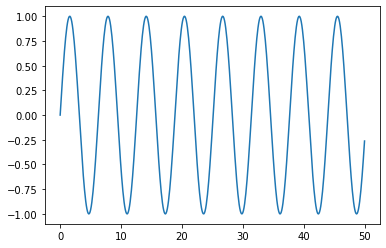

In [6]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [9]:
len(df)

501

In [10]:
test_percent = 0.1


In [11]:
len(df)*test_percent

50.1

In [12]:
test_point = np.round(len(df)*test_percent)

In [13]:
test_point

50.0

In [14]:
test_ind = int(len(df)-test_point)

In [15]:
test_ind

451

In [16]:
train = df.iloc[:test_ind]

In [17]:
test = df.iloc[test_ind:]

In [18]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler()

In [22]:
scaled_train = scaler.transform(train)

In [23]:
scaled_test = scaler.transform(test)

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [42]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [43]:
len(scaled_train)

451

In [44]:
len(generator)

426

In [45]:
X,y = generator[0]

In [46]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [47]:
y

array([[0.79923759]])

In [48]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


<AxesSubplot:>

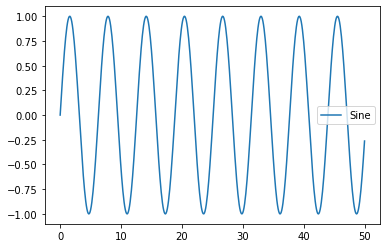

In [49]:
df.plot()

In [50]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [53]:
n_features = 1

In [55]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25428/1246993970.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


401/401 [==============================] - 5s 10ms/step - loss: 0.0043
Epoch 2/5
401/401 [==============================] - 4s 9ms/step - loss: 1.6448e-04
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 2.8871e-04
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 6.3746e-04
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 2.0453e-05


In [58]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

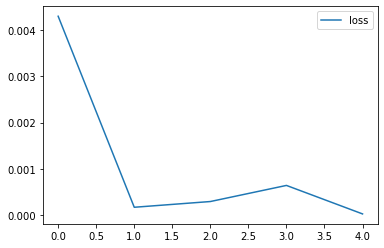

In [60]:
losses.plot()

In [61]:
first_eval_batch = scaled_train[-length:]

In [64]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [65]:
model.predict(first_eval_batch)

array([[0.95191455]], dtype=float32)

In [66]:
scaled_test[0]

array([0.94955134])

In [67]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))


In [68]:
#current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [69]:
#predicted_value = [[[99]]]

#np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [70]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [71]:
test_predictions

[array([0.95191455], dtype=float32),
 array([0.9724873], dtype=float32),
 array([0.98848414], dtype=float32),
 array([0.9999269], dtype=float32),
 array([1.0063522], dtype=float32),
 array([1.0083561], dtype=float32),
 array([1.0052214], dtype=float32),
 array([0.9972592], dtype=float32),
 array([0.9845161], dtype=float32),
 array([0.9674423], dtype=float32),
 array([0.9464399], dtype=float32),
 array([0.9217353], dtype=float32),
 array([0.8937242], dtype=float32),
 array([0.86238265], dtype=float32),
 array([0.82851166], dtype=float32),
 array([0.7923336], dtype=float32),
 array([0.7542651], dtype=float32),
 array([0.7148303], dtype=float32),
 array([0.6740056], dtype=float32),
 array([0.63215774], dtype=float32),
 array([0.5898696], dtype=float32),
 array([0.5474105], dtype=float32),
 array([0.5050584], dtype=float32),
 array([0.46331587], dtype=float32),
 array([0.422314], dtype=float32),
 array([0.38252392], dtype=float32),
 array([0.344462], dtype=float32),
 array([0.30835763], dt

In [72]:
true_predictions = scaler.inverse_transform(test_predictions)

In [74]:
test['Predictions'] = true_predictions

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25428/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [75]:
test

,Sine,Predictions
45.1,0.899097,0.903824
45.2,0.938307,0.944969
45.3,0.968142,0.976962
45.4,0.988304,0.999848
45.5,0.998591,1.012698
45.6,0.998900,1.016706
45.7,0.989229,1.010436
45.8,0.969673,0.994512
45.9,0.940429,0.969026
46.0,0.901788,0.934879


<AxesSubplot:>

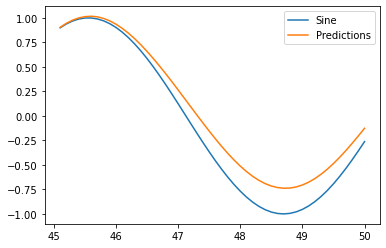

In [76]:
test.plot()

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [80]:
length = 49

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)


validation_genrator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [81]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [82]:
model.fit_generator(generator,epochs=20,validation_data=validation_genrator,callbacks=[early_stop])

Epoch 1/20


C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25428/2228710376.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_genrator,callbacks=[early_stop])


402/402 [==============================] - 5s 11ms/step - loss: 0.0031 - val_loss: 1.8126e-05
Epoch 2/20
402/402 [==============================] - 4s 11ms/step - loss: 2.8249e-04 - val_loss: 2.7930e-07
Epoch 3/20
402/402 [==============================] - 3s 9ms/step - loss: 0.0013 - val_loss: 4.9909e-05
Epoch 4/20
402/402 [==============================] - 4s 9ms/step - loss: 1.1081e-04 - val_loss: 3.7206e-06


In [83]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [87]:
true_predictions = scaler.inverse_transform(test_predictions)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25428/1700245719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<AxesSubplot:>

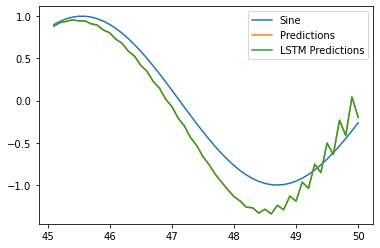

In [88]:
test['LSTM Predictions'] = true_predictions
test.plot()

<AxesSubplot:>

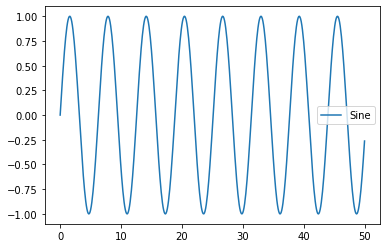

In [89]:
df.plot()

In [90]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [91]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)


In [92]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [93]:
model.fit_generator(generator,epochs=6)

Epoch 1/6


C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25428/1408342416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


452/452 [==============================] - 4s 7ms/step - loss: 0.0042
Epoch 2/6
452/452 [==============================] - 4s 8ms/step - loss: 0.0012
Epoch 3/6
452/452 [==============================] - 4s 9ms/step - loss: 7.3847e-05
Epoch 4/6
452/452 [==============================] - 4s 8ms/step - loss: 7.2148e-05
Epoch 5/6
452/452 [==============================] - 3s 7ms/step - loss: 1.5486e-04
Epoch 6/6
452/452 [==============================] - 3s 7ms/step - loss: 7.8054e-05


In [94]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [96]:
forecast = scaler.inverse_transform(forecast)

In [97]:
forecast

array([[ 0.90442347],
       [ 0.94166487],
       [ 0.97037655],
       [ 0.98805896],
       [ 0.99478648],
       [ 0.99151505],
       [ 0.97595693],
       [ 0.95113871],
       [ 0.91694809],
       [ 0.87209465],
       [ 0.81963177],
       [ 0.75874266],
       [ 0.69023125],
       [ 0.6168013 ],
       [ 0.53551278],
       [ 0.44999522],
       [ 0.36029489],
       [ 0.26640664],
       [ 0.17014305],
       [ 0.07050885],
       [-0.02993633],
       [-0.13085435],
       [-0.23185039],
       [-0.33095627],
       [-0.42800812]])

In [98]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [99]:
len(forecast_index)

25

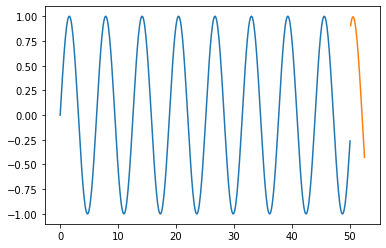

In [101]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)
